In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

def auc_plot(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluation(model, X_test, y_test):
    # 예측 결과
    y_pred = model.predict(X_test)

    # 정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(f"정확도: {accuracy * 100:.4f}%")

    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    print("혼동 행렬:\n", cm)

    # 정밀도: 정밀도는 예측한 클래스 1 중에서 실제로 클래스 1인 비율
    precision = precision_score(y_test, y_pred)
    print(f"정밀도: {precision:.4f}")

    # 재현율: 재현율은 실제 클래스 1 중에서 모델이 클래스 1로 예측한 비율
    recall = recall_score(y_test, y_pred)
    print(f"재현율: {recall:.4f}")

    # F1 점수: F1 점수는 정밀도와 재현율의 조화 평균, 두 지표의 균형을 맞추기 위한 지표
    f1 = f1_score(y_test, y_pred)
    print(f"F1 점수: {f1:.4f}")
    
    # ROC 곡선과 AUC
    auc_plot(model, X_test, y_test)

In [96]:
# 'balance'와 'estimated_salary' 컬럼을 skewed_columns 리스트에 추가
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
skewed_columns = ['balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
# skewed_columns = ['age', 'balance', 'estimated_salary']  # 'balance'와 'estimated_salary' 추가

# log1p 변환 함수
def log1p_transform_columns(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p는 log(x+1)
    return df

# log1p 변환 수행
df = log1p_transform_columns(df, skewed_columns)

# log1p 변환 후 데이터 분포 시각화
# for column in skewed_columns:
#     sns.histplot(df[f'log1p_{column}'], kde=True)
#     plt.title(f'Log1p Transformed Data Distribution for {column}')
#     plt.show()

# # 결과 출력
# print(df.head())

# 변환된 'log1p_' 컬럼을 원래 컬럼에 대체하고, 불필요한 컬럼 제거
# for column in skewed_columns:
#     df[column] = df[f'log1p_{column}']
#     df.drop([f'log1p_{column}'], axis=1, inplace=True)

# 최종 데이터 확인
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,6.429719,0,1,42,2,0.000000,1,1,1,11.526334,1
1,6.411818,2,1,41,1,11.336294,1,0,1,11.631096,0
2,6.220590,0,1,42,8,11.980813,3,1,0,11.643362,1
3,6.551080,0,1,39,1,0.000000,2,0,0,11.449215,0
4,6.746412,2,1,43,2,11.740155,1,1,1,11.278280,0


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 정규화 (Normalization) - 0과 1 사이로 변환
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

리포트 :
               precision    recall  f1-score   support

           0     0.8664    0.8497    0.8580      2389
           1     0.4536    0.4877    0.4700       611

    accuracy                         0.7760      3000
   macro avg     0.6600    0.6687    0.6640      3000
weighted avg     0.7823    0.7760    0.7790      3000



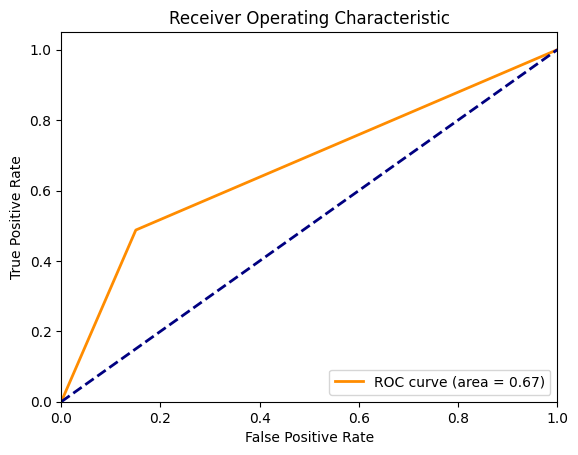

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

auc_plot(clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.8740    0.9615    0.9157      2389
           1     0.7527    0.4583    0.5697       611

    accuracy                         0.8590      3000
   macro avg     0.8134    0.7099    0.7427      3000
weighted avg     0.8493    0.8590    0.8452      3000



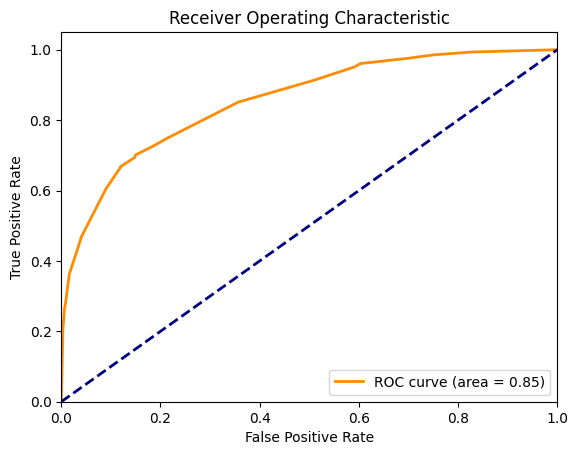

In [99]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': range(1, 11),
#     # 'criterion': ['gini', 'entropy'],
#     # 'splitter': ['best', 'random'],
#     'min_samples_split': range(2, 11),
#     'min_samples_leaf': range(1, 11),
# }

# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# 
# .fit(X_train, y_train)

# print('최적의 하이퍼파라미터 :', grid_search.best_params_)

# 최적의 하이퍼파라미터 : {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

from sklearn.metrics import classification_report
# 최적의 하이퍼파라미터로 학습
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

clf.fit(X_train, y_train)
# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

auc_plot(clf, X_test, y_test)

리포트 :
               precision    recall  f1-score   support

           0     0.8706    0.9627    0.9143      2389
           1     0.7514    0.4403    0.5552       611

    accuracy                         0.8563      3000
   macro avg     0.8110    0.7015    0.7348      3000
weighted avg     0.8463    0.8563    0.8412      3000



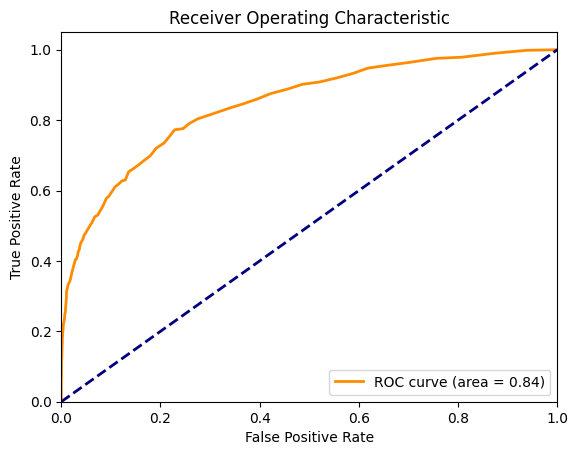

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# 테스트 데이터로 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

auc_plot(rf, X_test, y_test)

In [101]:
# from sklearn.model_selection import GridSearchCV

# # 그리드 탐색을 위한 파라미터 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
# }

# # 랜덤 포레스트 모델 생성
# rf = RandomForestClassifier(random_state=42)

# # 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print('최적의 파라미터 :', grid_search.best_params_)

              precision    recall  f1-score   support

           0     0.8705    0.9653    0.9154      2389
           1     0.7635    0.4386    0.5572       611

    accuracy                         0.8580      3000
   macro avg     0.8170    0.7019    0.7363      3000
weighted avg     0.8487    0.8580    0.8425      3000



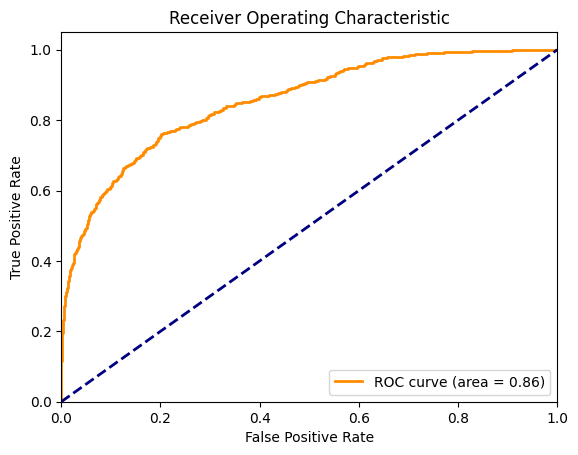

In [102]:
# 최적의 파라미터 : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

auc_plot(rf, X_test, y_test)

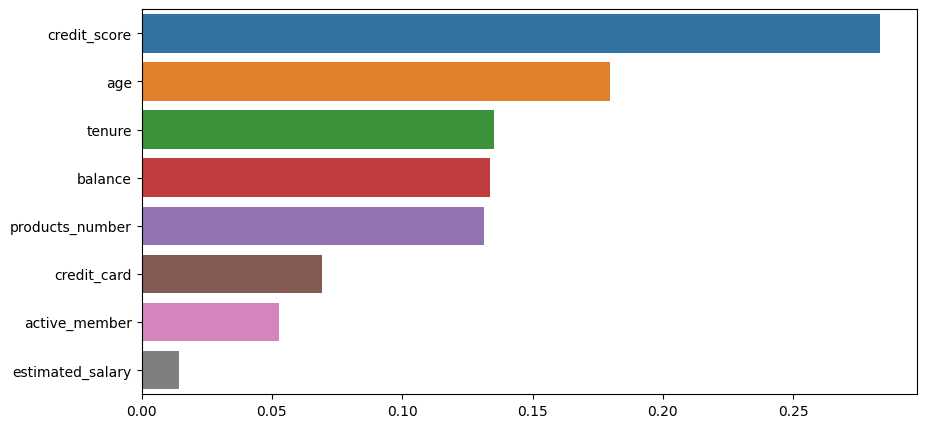

In [103]:
# 피처 중요도 출력
feature_importances = rf.feature_importances_
# 정렬
feature_importances = np.sort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, hue=features, dodge=False)
plt.show()

In [104]:
# %pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [105]:
# catboost 모델 적용
from catboost import CatBoostClassifier

# CatBoost 모델 생성

cat = CatBoostClassifier(random_state=42)

# 학습
cat.fit(X_train, y_train)

Learning rate set to 0.023648
0:	learn: 0.6744823	total: 3.14ms	remaining: 3.14s
1:	learn: 0.6557787	total: 5.99ms	remaining: 2.99s
2:	learn: 0.6395582	total: 8.07ms	remaining: 2.68s
3:	learn: 0.6240559	total: 9.84ms	remaining: 2.45s
4:	learn: 0.6095650	total: 11.6ms	remaining: 2.3s
5:	learn: 0.5955469	total: 13.2ms	remaining: 2.19s
6:	learn: 0.5817837	total: 15.3ms	remaining: 2.16s
7:	learn: 0.5688874	total: 17.2ms	remaining: 2.13s
8:	learn: 0.5566281	total: 18.9ms	remaining: 2.08s
9:	learn: 0.5475581	total: 20.6ms	remaining: 2.04s
10:	learn: 0.5373997	total: 22.2ms	remaining: 2s
11:	learn: 0.5275365	total: 23.9ms	remaining: 1.97s
12:	learn: 0.5186193	total: 25.6ms	remaining: 1.94s
13:	learn: 0.5117508	total: 28.3ms	remaining: 2s
14:	learn: 0.5031219	total: 30.5ms	remaining: 2s
15:	learn: 0.4948390	total: 32.8ms	remaining: 2.02s
16:	learn: 0.4867983	total: 37ms	remaining: 2.14s
17:	learn: 0.4799285	total: 39ms	remaining: 2.13s
18:	learn: 0.4737477	total: 40.8ms	remaining: 2.11s
19:	le

              precision    recall  f1-score   support

           0     0.8721    0.9644    0.9159      2389
           1     0.7626    0.4468    0.5635       611

    accuracy                         0.8590      3000
   macro avg     0.8173    0.7056    0.7397      3000
weighted avg     0.8498    0.8590    0.8441      3000



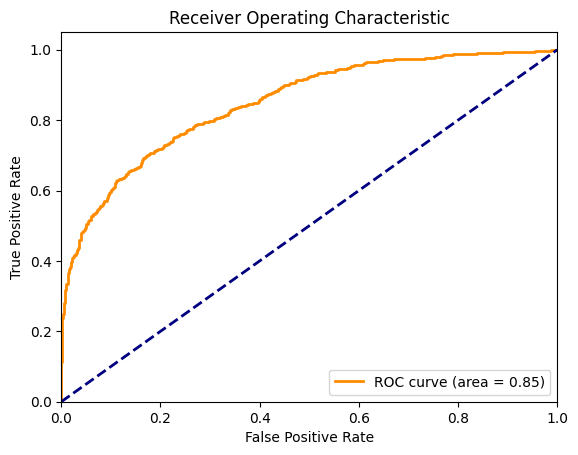

In [106]:
# 예측
y_pred = cat.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)

In [107]:
# param_grid = {
#     'depth': [2,3,4],
#     'learning_rate': [0.05, 0.1, 0.5],
#     'iterations': [50, 100, 150],
# }

# grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print('최적의 파라미터 :', grid_search.best_params_)

In [108]:
# 최적의 파라미터 : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

cat = CatBoostClassifier(random_state=42, depth=4, iterations=100, learning_rate=0.1)

cat.fit(X_train, y_train)

0:	learn: 0.6464634	total: 1.01ms	remaining: 100ms
1:	learn: 0.6053348	total: 5.14ms	remaining: 252ms
2:	learn: 0.5745701	total: 6.81ms	remaining: 220ms
3:	learn: 0.5467781	total: 7.94ms	remaining: 191ms
4:	learn: 0.5238689	total: 9.12ms	remaining: 173ms
5:	learn: 0.5037690	total: 10.9ms	remaining: 170ms
6:	learn: 0.4861531	total: 12.5ms	remaining: 166ms
7:	learn: 0.4710029	total: 13.3ms	remaining: 153ms
8:	learn: 0.4580213	total: 14.8ms	remaining: 150ms
9:	learn: 0.4468045	total: 15.6ms	remaining: 141ms
10:	learn: 0.4368222	total: 17.1ms	remaining: 139ms
11:	learn: 0.4281312	total: 19.2ms	remaining: 141ms
12:	learn: 0.4208029	total: 20ms	remaining: 134ms
13:	learn: 0.4155846	total: 20.9ms	remaining: 129ms
14:	learn: 0.4089106	total: 21.9ms	remaining: 124ms
15:	learn: 0.4035765	total: 22.7ms	remaining: 119ms
16:	learn: 0.3992297	total: 25ms	remaining: 122ms
17:	learn: 0.3945264	total: 25.9ms	remaining: 118ms
18:	learn: 0.3909941	total: 26.8ms	remaining: 114ms
19:	learn: 0.3877919	total

              precision    recall  f1-score   support

           0     0.8724    0.9699    0.9185      2389
           1     0.7907    0.4452    0.5696       611

    accuracy                         0.8630      3000
   macro avg     0.8315    0.7075    0.7441      3000
weighted avg     0.8557    0.8630    0.8475      3000



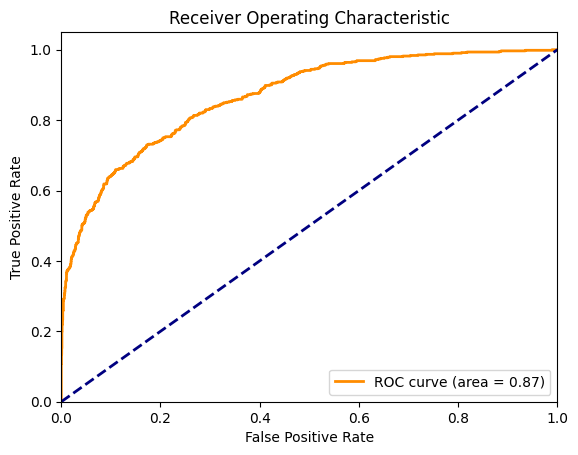

In [109]:
y_pred = cat.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

auc_plot(cat, X_test, y_test)

| 모델              | 정확도  | 정밀도 (0) | 정밀도 (1) | 재현율 (0) | 재현율 (1) | F1 Score (0) | F1 Score (1) |
|-----------------|--------|---------|---------|---------|---------|------------|------------|
| 검증트리 (전)   | 0.7645 | 0.8648  | 0.4307  | 0.8349  | 0.4889  | 0.8496     | 0.4580     |
| 검증트리 (후)   | 0.8590 | 0.8681  | 0.7854  | 0.9705  | 0.4226  | 0.9164     | 0.5495     |
| 랜덤 포레스트 (전) | 0.8545 | 0.8682  | 0.7500  | 0.9636  | 0.4275  | 0.9134     | 0.5446     |
| 랜덤 포레스트 (후) | 0.8580 | 0.8679  | 0.7783  | 0.9692  | 0.4226  | 0.9158     | 0.5478     |
| 캣부스트 (전)   | 0.8590 | 0.8718  | 0.7637  | 0.9648  | 0.4447  | 0.9160     | 0.5621     |
| 캣부스트 (후)   | 0.8580 | 0.8700  | 0.7662  | 0.9661  | 0.4349  | 0.9155     | 0.5549     |


# 🔍 인사이트 분석

## 1️⃣ **튜닝 전후 성능 변화**
✅ **튜닝 후 모든 모델의 정확도 향상**  
- 검증트리: **76.45% → 85.90% (가장 큰 향상)**  
- 랜덤 포레스트: **85.45% → 85.80% (소폭 개선)**  
- 캣부스트: **85.90% → 85.80% (큰 변화 없음)**  

✅ **정밀도(1) 향상, 재현율(1) 감소**  
- 검증트리 정밀도(1): **43.07% → 78.54% (대폭 증가)**  
- 하지만 **재현율(1)은 48.89% → 42.26%로 감소** → 모델이 더 보수적으로 판단  

---

## 2️⃣ **모델별 특징 비교**
### 🌲 **검증트리**
- **튜닝 후 정확도 상승폭이 가장 큼** (76.45% → 85.90%)
- **정밀도(1) 대폭 향상 (43.07% → 78.54%)**, 하지만 **재현율(1) 감소 (48.89% → 42.26%)**
- ✅ **양성(1)을 신중하게 예측하는 모델로 변경됨**  
- ❌ **실제 양성을 놓칠 가능성이 높아짐**  

### 🌳 **랜덤 포레스트**
- **전체적으로 균형 잡힌 성능 유지**  
- 정밀도(1)와 재현율(1)의 **변화 폭이 적음**  
- ✅ **신뢰성이 높고 과적합 가능성이 적음**  
- ❌ **검증트리보다 정밀도(1) 개선 폭이 적음**  

### 🐱 **캣부스트**
- **F1 Score(1)이 가장 높음 (전: 56.21%, 후: 55.49%)**
- **정밀도(1)와 재현율(1)의 균형이 가장 좋음**  
- ✅ **양성과 음성을 모두 고르게 잘 예측**  
- ❌ **튜닝 후 성능 향상이 거의 없음**  

---

## 3️⃣ **최적의 모델 선택 가이드**
| 목표  | 최적의 모델 |
|------|------------|
| **최고의 정확도** | 검증트리 (튜닝 후) |
| **최고의 정밀도(1)** | 검증트리 (튜닝 후) |
| **최고의 재현율(1)** | 캣부스트 (튜닝 전) |
| **가장 균형 잡힌 성능** | 캣부스트 (튜닝 전) |

✅ **정확도가 중요하면 → `검증트리 (튜닝 후)`**  
✅ **재현율이 중요하면 → `캣부스트 (튜닝 전)`**  
✅ **균형 잡힌 성능을 원하면 → `캣부스트 (튜닝 전)`**  

---

# 🏆 **최종 결론**
- **검증트리 (튜닝 후)**: 정확도와 정밀도를 극대화 → False Positive 최소화  
- **랜덤 포레스트 (튜닝 후)**: 안정적이고 신뢰성이 높은 성능  
- **캣부스트 (튜닝 전)**: 가장 균형 잡힌 모델, 재현율(1) 유지  

🎯 **목적에 따라 최적의 모델을 선택하는 것이 중요!**